In [58]:
import numpy as np
import matplotlib.pyplot as plt
from random import random
import pandas as pd
import keras

from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans, DBSCAN

Using TensorFlow backend.


In [2]:
def create_dataset_00():
    Centers = [
        (0,0),
        (1,1),
        (2,1),
        (1,3)
    ]
    Centers = np.array(Centers)
    Points = []
    for center in Centers:
        var = np.array([[1,.5], [0,2]])
        Points.append(
            np.random.multivariate_normal(
                center,
                0.05*var,
                100
            )
        )
    Points = np.vstack(Points)
    return Points

In [3]:
def create_dataset_01():
    def line0(x):
        return (x, 10 - x ** 2 + (random() - 0.5))

    Points = []
    for _ in range(1000):
        x = 5 * (random() - 0.5)
        point = line0(x)
        Points.append(point)

    def line1(x):
        return (x, 5 * random() + ((x) * (x - 8)) + 5)

    for _ in range(1000):
        x = 5 * (random() + .1)
        point = line1(x)
        Points.append(point)

    Points = np.array(Points)
    return np.vstack(
        [
            Points,
            np.random.multivariate_normal((5, 5), [[1, 0], [0, 1]], 100)
        ])

In [4]:
data_00 = create_dataset_00()

c:\users\alpal\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  app.launch_new_instance()


In [5]:
data_00.shape

(400, 2)

In [6]:
data_01 = create_dataset_01()

In [7]:
data_01.shape

(2100, 2)

Visualization of Data Set 1:

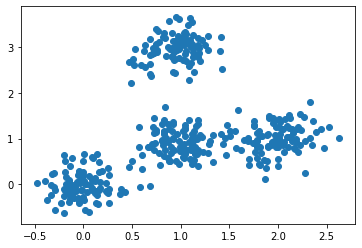

In [8]:
#plt.scatter(X_00,Y_00)
plt.scatter(data_00[:,0],data_00[:,1])

Visualization of Data Set 2:

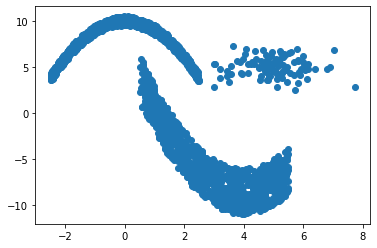

In [9]:
plt.scatter(data_01[:,0],data_01[:,1])

K-Means Clustering:

Text(0.5, 1.0, 'Example 1')

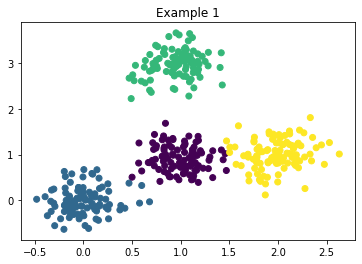

In [44]:
kmeans_00 = KMeans(n_clusters=4)
y_pred = kmeans_00.fit_predict(data_00)

plt.scatter(data_00[:,0], data_00[:,1], c=y_pred)
plt.title("Example 1")

Text(0.5, 1.0, 'Example 2')

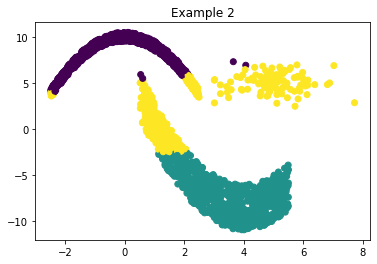

In [11]:
kmeans_01 = KMeans(n_clusters=3)
y_pred = kmeans_01.fit_predict(data_01)

plt.scatter(data_01[:,0], data_01[:,1], c=y_pred)
plt.title("Example 2")

DBScan Clustering:

Text(0.5, 1.0, 'Example 1')

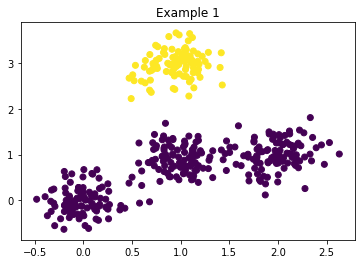

In [12]:
dbs_00 = DBSCAN(eps=0.5, min_samples=10)
y_pred = dbs_00.fit_predict(data_00)

plt.scatter(data_00[:,0], data_00[:,1], c=y_pred)
plt.title("Example 1")

Text(0.5, 1.0, 'Example 1')

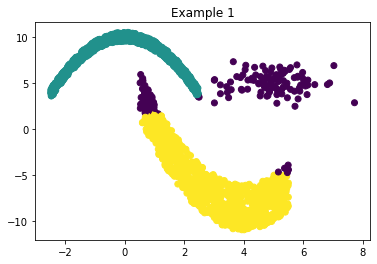

In [42]:
dbs_01 = DBSCAN(eps=0.50, min_samples=25)
y_pred = dbs_01.fit_predict(data_01)

plt.scatter(data_01[:,0], data_01[:,1], c=y_pred)
plt.title("Example 1")

Now we will train a TensorFlow classifier to take a point in a two dimensional plane and classify it as one of the clusters from KMeans.



In [72]:
X = (data_00)
Y = (y_pred)

In [73]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y)

In [76]:
X_train = X_train.reshape(300,2)
Y_train = Y_train.reshape(300,1)

In [77]:
model = keras.Sequential([
    keras.layers.Dense(20, activation='relu'),
    keras.layers.Dense(4, activation='softmax')
])

In [80]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [81]:
model.fit(X_train, Y_train, epochs=80)

Instructions for updating:
Use tf.cast instead.
Epoch 1/80
300/300 [==============================] - 0s 767us/step - loss: 1.3925 - acc: 0.1833
Epoch 2/80
300/300 [==============================] - 0s 30us/step - loss: 1.3383 - acc: 0.1033
Epoch 3/80
300/300 [==============================] - 0s 40us/step - loss: 1.2877 - acc: 0.2600
Epoch 4/80
300/300 [==============================] - 0s 43us/step - loss: 1.2445 - acc: 0.3733
Epoch 5/80
300/300 [==============================] - 0s 47us/step - loss: 1.2047 - acc: 0.4100
Epoch 6/80
300/300 [==============================] - 0s 50us/step - loss: 1.1686 - acc: 0.4400
Epoch 7/80
300/300 [==============================] - 0s 53us/step - loss: 1.1344 - acc: 0.5000
Epoch 8/80
300/300 [==============================] - 0s 43us/step - loss: 1.1022 - acc: 0.5933
Epoch 9/80
300/300 [==============================] - 0s 50us/step - loss: 1.0712 - acc: 0.6333
Epoch 10/80
300/300 [==============================] - 0s 50us/step - loss: 1.0414 - ac

In [84]:
model.evaluate(X_test,Y_test)

100/100 [==============================] - 0s 410us/step


[0.2094302976131439, 0.97]